# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [55]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
boston = pd.read_csv('/Users/mehranskohli/Desktop/labs/data-labs/module-3/lab-problems-with-ML-master/data/boston_data.csv')

In [57]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [58]:
pd.isnull(boston).any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

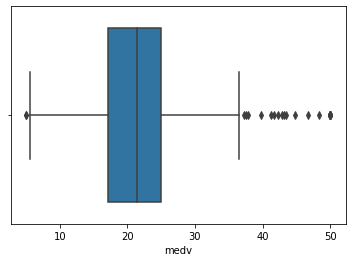

In [59]:
sns.boxplot(x=boston['medv'])

In [60]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_new = boston[~((boston[boston.columns.difference(['chas'])] < (Q1 - 1.5 * IQR))
                      |(boston[boston.columns.difference(['chas'])] > (Q3 + 1.5 * IQR))).any(axis=1)]

boston_new.head()

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

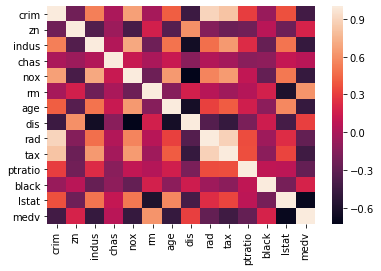

In [61]:
# Your plots here
sns.heatmap(boston_new.corr(method="pearson"))

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

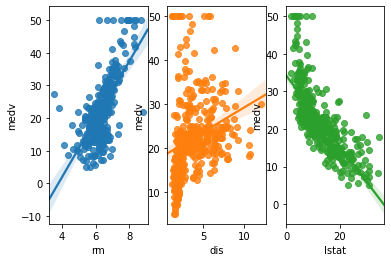

In [62]:
# Your response here
f, axes = plt.subplots(1, 3)

sns.regplot(x='rm', y='medv', data=boston, ax=axes[0])
sns.regplot(x='dis', y='medv', data=boston, ax=axes[1])
sns.regplot(x='lstat', y='medv', data=boston, ax=axes[2])

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

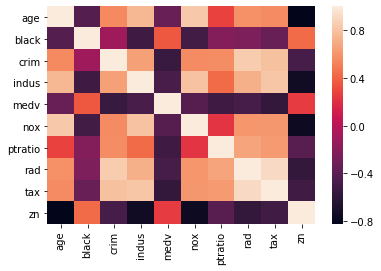

In [63]:
# Your response here
subset_boston = boston_out[boston_out.columns.difference(['rm', 'lstat', 'dis'])]

sns.heatmap(subset_boston.corr(method="pearson"))
boston_new = boston_new.drop(columns = 'rad')

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [64]:
# Your code here
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [68]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [70]:
# Your code here

from sklearn.model_selection import train_test_split

boston_shuffle = boston2.sample(frac=1)
x = boston_shuffle[boston_shuffle.columns.difference(['medv'])]
y = boston_shuffle['medv']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [72]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor


Depth_2 = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
Depth_4 = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
Depth_6 = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
Depth_8 = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
Depth_10 = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Now, plot the score for each tree on the training set and on the testing set.

In [77]:
# Produce a plot with the score for the testing and training for the different max depths
y_train2 = Depth_2.predict(X_train)
y_train4 = Depth_4.predict(X_train)
y_train6 = Depth_6.predict(X_train)
y_train8 = Depth_8.predict(X_train)
y_train10 = Depth_10.predict(X_train)

y_test2 = Depth_2.predict(X_test)
y_test4 = Depth_4.predict(X_test)
y_test6 = Depth_6.predict(X_test)
y_test8 = Depth_8.predict(X_test)
y_test10 = Depth_10.predict(X_test)

score2_train = performance_metric(y_train, y_train2)
score4_train = performance_metric(y_train, y_train4)
score6_train = performance_metric(y_train, y_train6)
score8_train = performance_metric(y_train, y_train8)
score10_train = performance_metric(y_train, y_train10)

score2_test = performance_metric(y_test, y_test2)
score4_test = performance_metric(y_test, y_test4)
score6_test = performance_metric(y_test, y_test6)
score8_test = performance_metric(y_test, y_test8)
score10_test = performance_metric(y_test, y_test10)


print(score2_train,score2_test)
print(score4_train, score4_test)
print(score6_train, score6_test)
print(score8_train, score8_test)
print( score10_train, score10_test)

0.8622072000096097 0.7774377979497904
0.9616135235209028 0.6946033689097499
0.9611210957712361 0.6924283856173961
0.977411746814475 0.7126846160817485
0.9781744853445451 0.5269549867266707


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
#train score increases as depth increases

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [76]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here